In [3]:
import boto3
import botocore
import sagemaker
import sys
bucket = 'preethstestbucket'  
prefix = 'sagemaker/rcf-benchmarks'
execution_role = sagemaker.get_execution_role()

try:
    boto3.Session().client('s3').head_bucket(Bucket=bucket)
except botocore.exceptions.ParamValidationError as e:
    print('Hey! You either forgot to specify your S3 bucket'
          ' or you gave your bucket an invalid name!')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == '403':
        print("Hey! You don't have permission to access the bucket, {}.".format(bucket))
    elif e.response['Error']['Code'] == '404':
        print("Hey! Your bucket, {}, doesn't exist!".format(bucket))
    else:
        raise
else:
    print('Training input/output will be stored in: s3://{}/{}'.format(bucket, prefix))

Training input/output will be stored in: s3://preethstestbucket/sagemaker/rcf-benchmarks


In [4]:
import io
import pandas as pd
s3 = boto3.client('s3')
obj = s3.get_object(Bucket='preethstestbucket', Key='data/twocounties.csv')

df_sample = pd.read_csv(io.BytesIO(obj['Body'].read()),error_bad_lines=False)
df_sample.describe()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TransId,FIPS,PartialInterestTransferPercent,SalesPriceAmount,CityTransferTax,CountyTransferTax,StateTransferTax,TotalTransferTax,LoanAmount,MaximumLoanAmount,PropertyZip,PropertyAddressLatitude,PropertyAddressLongitude,BuildingAreaSqFt,LotSizeSquareFeet,TotalBedrooms,TotalActualBathCount,NoOfStories
count,1.791056e+07,1.791056e+07,137520.000000,9.418605e+06,9.404987e+06,9.404987e+06,171.000000,9.423427e+06,1.665182e+07,7.897000e+03,1.790967e+07,1.790728e+07,1.790728e+07,1.791056e+07,1.772962e+07,1.791056e+07,15.0,2.760232e+06
mean,5.269567e+07,1.328400e+04,36.689696,1.960526e+05,2.442756e+04,7.980350e+04,11839.936784,3.115438e+03,2.629628e+05,2.043550e+05,9.209204e+04,3.616143e+01,-1.188647e+02,2.543909e+03,3.053611e+04,3.257076e+00,3.5,1.429948e+00
std,1.219204e+08,1.697236e+04,20.566205,1.295908e+06,1.268064e+05,2.917993e+05,40509.833163,8.074893e+04,5.195815e+07,6.201047e+05,2.676636e+03,4.867751e+00,1.447083e+00,1.060409e+04,1.334370e+05,1.702580e+00,0.0,7.018403e-01
min,1.515715e+06,6.037000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,0.000000e+00,5.000000e+03,9.000100e+04,3.333917e+01,-1.225264e+02,1.000000e+00,1.440000e+02,0.000000e+00,3.5,0.000000e+00
25%,6.293374e+06,6.037000e+03,19.000000,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,0.000000e+00,7.000000e+04,9.027800e+04,3.397453e+01,-1.185076e+02,1.241000e+03,5.855000e+03,2.000000e+00,3.5,1.000000e+00
50%,1.097661e+07,6.037000e+03,50.000000,0.000000e+00,0.000000e+00,0.000000e+00,7570.000000,0.000000e+00,1.250000e+05,1.200000e+05,9.130200e+04,3.410394e+01,-1.183176e+02,1.644000e+03,7.440000e+03,3.000000e+00,3.5,1.000000e+00
75%,1.555676e+07,6.037000e+03,50.000000,2.520000e+05,0.000000e+00,3.212000e+04,11619.500000,0.000000e+00,2.780000e+05,2.450000e+05,9.176600e+04,3.428184e+01,-1.181388e+02,2.331000e+03,1.239500e+04,4.000000e+00,3.5,2.000000e+00
max,4.513874e+08,5.303300e+04,99.000000,1.674641e+09,4.342500e+07,1.061500e+07,516205.000000,9.932900e+06,2.114701e+11,4.500000e+07,9.844300e+04,4.782740e+01,-1.176515e+02,3.585714e+06,7.637489e+07,8.800000e+01,3.5,9.900000e+01


In [5]:
df = df_sample[(df_sample.PropertyLandUseStndCode == 'RR101') & (df_sample.SalesPriceAmount > 0)]
df.drop(['SignatureDate','EffectiveDate','PartialInterestTransferStndCode','PartialInterestTransferPercent','StateTransferTax','IntraFamilyTransferFlag','MaximumLoanAmount','TotalActualBathCount','NoOfStories','OccupancyStatusStndCode'], axis=1, inplace=True)
df = df.dropna()
df.count()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


TransId                      2102236
FIPS                         2102236
State                        2102236
County                       2102236
DataClassStndCode            2102236
RecordTypeStndCode           2102236
RecordingDate                2102236
DocumentDate                 2102236
SalesPriceAmount             2102236
SalesPriceAmountStndCode     2102236
CityTransferTax              2102236
CountyTransferTax            2102236
TotalTransferTax             2102236
PropertyLandUseStndCode      2102236
LoanAmount                   2102236
LoanAmountStndCode           2102236
PropertyFullStreetAddress    2102236
PropertyCity                 2102236
PropertyState                2102236
PropertyZip                  2102236
PropertyAddressLatitude      2102236
PropertyAddressLongitude     2102236
BuildingAreaSqFt             2102236
LotSizeSquareFeet            2102236
TotalBedrooms                2102236
dtype: int64

In [6]:
df_propertyzip = df[(df.PropertyZip.isin([91745.0, 91387.0, 91433.0, 98118.0, 98038.0, 98136.0,90264.0,90265.0,90263.0]) )]


In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.dpi'] = 150

sample = df_propertyzip.sample(n=1000)
sample['salesGroup'] = 11
for i, row in sample.iterrows():
    
    if(row['SalesPriceAmount']<10000):
        sample.at[i,'salesGroup'] = -1
        continue
    if(row['SalesPriceAmount']<100000):
        sample.at[i,'salesGroup'] = 1
        continue
    if(row['SalesPriceAmount']<500000):
        
        sample.at[i,'salesGroup']= 2
        continue
    if(row['SalesPriceAmount']<800000):
        sample.at[i,'salesGroup']= 3
        continue
    if(row['SalesPriceAmount']<1000000):
        sample.at[i,'salesGroup'] = 4
        continue
    if(row['SalesPriceAmount']<10000000):
        sample.at[i,'salesGroup'] = 5
        continue
    sample.at[i,'salesGroup'] = 100
sample['SalesPriceAmount'] = sample['SalesPriceAmount'].div(10000).round(1)
sample['CountyTransferTax'] = sample['CountyTransferTax'].div(10000).round(1)
sample['LoanAmount'] = sample['LoanAmount'].div(10000).round(1)

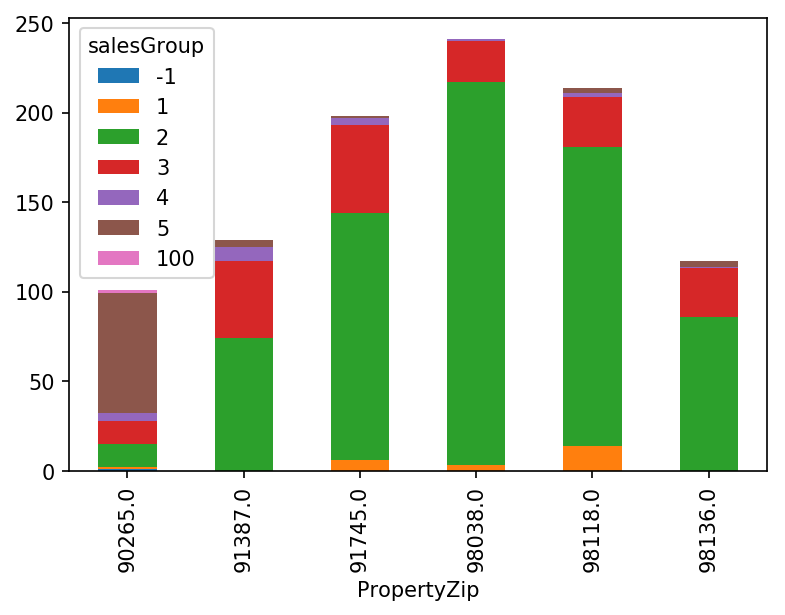

In [23]:
sample.groupby(['PropertyZip','salesGroup']).size().unstack().plot(kind='bar',stacked=True)

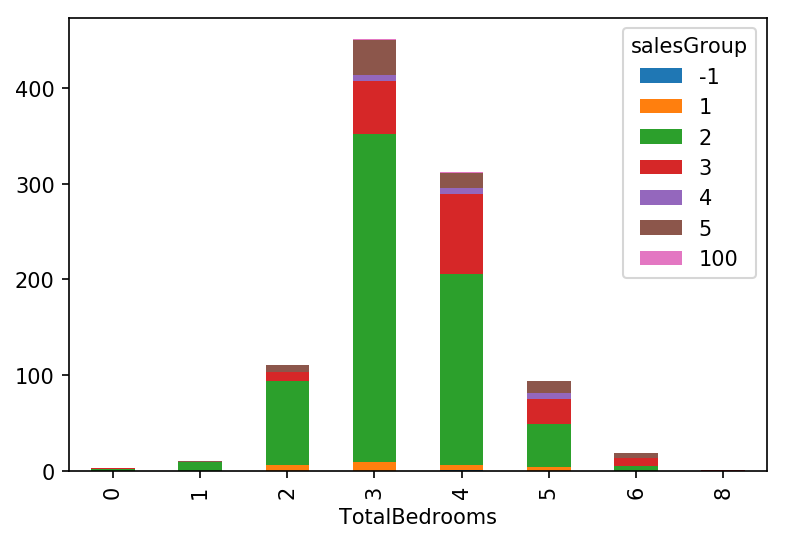

In [24]:
sample.groupby(['TotalBedrooms','salesGroup']).size().unstack().plot(kind='bar',stacked=True)

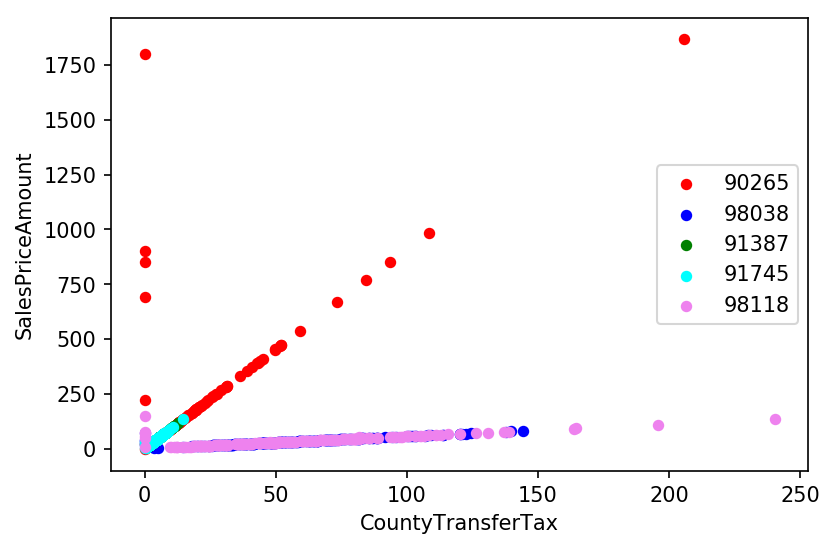

In [25]:
sample_a = sample[(sample.PropertyZip ==  90265.0)]
sample_b = sample[(sample.PropertyZip == 98038.0)]
sample_c = sample[(sample.PropertyZip == 91387.0)]
sample_d = sample[(sample.PropertyZip == 91745.0)]
sample_e = sample[(sample.PropertyZip == 98118.0)]

ax = sample_a.plot(kind = 'scatter', x='CountyTransferTax',y='SalesPriceAmount', color='red', label = '90265')
sample_b.plot(kind = 'scatter', x='CountyTransferTax',y='SalesPriceAmount', color='blue', ax=ax, label = '98038')
sample_c.plot(kind = 'scatter', x='CountyTransferTax',y='SalesPriceAmount', color='green', ax=ax, label = '91387')
sample_d.plot(kind = 'scatter', x='CountyTransferTax',y='SalesPriceAmount', color='cyan', ax=ax, label = '91745')
sample_e.plot(kind = 'scatter', x='CountyTransferTax',y='SalesPriceAmount', color='violet', ax=ax, label = '98118')


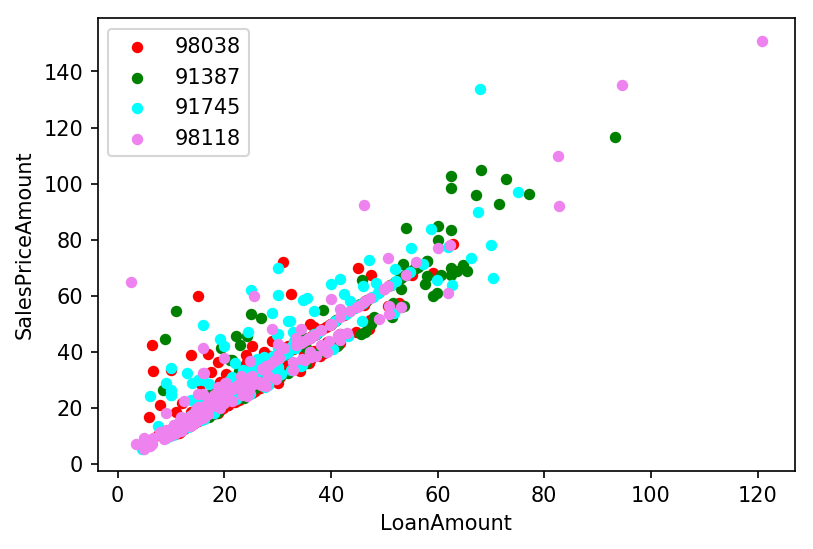

In [26]:
sample_loan1 = sample_a[(sample_a.LoanAmount > 0)]
sample_loan2 = sample_b[(sample_b.LoanAmount > 0)]
sample_loan3 = sample_c[(sample_c.LoanAmount > 0)]
sample_loan4 = sample_d[(sample_d.LoanAmount > 0)]
sample_loan5 = sample_e[(sample_e.LoanAmount > 0)]


ax = sample_loan2.plot(kind = 'scatter', x='LoanAmount',y='SalesPriceAmount', color='red', label = '98038')
#sample_loan2.plot(kind = 'scatter', x='LoanAmount',y='SalesPriceAmount', color='blue', ax=ax, label = '98038')
sample_loan3.plot(kind = 'scatter', x='LoanAmount',y='SalesPriceAmount', color='green', ax=ax, label = '91387')
sample_loan4.plot(kind = 'scatter', x='LoanAmount',y='SalesPriceAmount', color='cyan', ax=ax, label = '91745')
sample_loan5.plot(kind = 'scatter', x='LoanAmount',y='SalesPriceAmount', color='violet', ax=ax, label = '98118')

In [29]:
new = pd.DataFrame(df, columns = ['SalesPriceAmount', 'CountyTransferTax','TotalBedrooms','PropertyZip'])

In [30]:
from sagemaker import RandomCutForest

session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(role=execution_role,
                      train_instance_count=1,
                      train_instance_type='ml.m4.xlarge',
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      num_samples_per_tree=512,
                      num_trees=50)

# automatically upload the training data to S3 and run the training job
rcf.fit(rcf.record_set(new.values))

INFO:sagemaker:Creating training-job with name: randomcutforest-2019-02-07-09-22-04-440


2019-02-07 09:22:04 Starting - Starting the training job...
2019-02-07 09:22:05 Starting - Launching requested ML instances......
2019-02-07 09:23:09 Starting - Preparing the instances for training...
2019-02-07 09:23:58 Downloading - Downloading input data
2019-02-07 09:23:58 Training - Downloading the training image......
2019-02-07 09:25:05 Uploading - Uploading generated training model
Docker entrypoint called with argument(s): train
[02/07/2019 09:24:57 INFO 140654491244352] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'eval_metrics': [u'accuracy', u'precision_recall_fscore'], u'_num_kv_servers': u'auto', u'mini_batch_size': 1000}
[02/07/2019 09:24:57 INFO 140654491244352] Reading provided configur

In [31]:
print('Training job name: {}'.format(rcf.latest_training_job.job_name))


Training job name: randomcutforest-2019-02-07-09-22-04-440


In [32]:
rcf_inference = rcf.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
)

INFO:sagemaker:Creating model with name: randomcutforest-2019-02-07-09-25-52-821
INFO:sagemaker:Creating endpoint with name randomcutforest-2019-02-07-09-22-04-440


--------------------------------------------------------------------------------------!

In [33]:
print('Endpoint name: {}'.format(rcf_inference.endpoint))

Endpoint name: randomcutforest-2019-02-07-09-22-04-440


In [34]:
from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

df_numpy = new.values
print(df_numpy[:5])
results = rcf_inference.predict(df_numpy[:5])
print(results)
print(df_numpy.size)
print(new.count())

[[2.6800e+05 2.9480e+04 3.0000e+00 9.1745e+04]
 [1.5000e+05 1.6500e+04 4.0000e+00 9.1387e+04]
 [9.1000e+05 1.0010e+05 2.0000e+00 9.1423e+04]
 [9.7300e+05 1.0703e+05 3.0000e+00 9.1791e+04]
 [3.2900e+05 3.6190e+04 4.0000e+00 9.3551e+04]]
{'scores': [{'score': 0.5289932335}, {'score': 0.5072965538}, {'score': 0.7713204666}, {'score': 0.7971949546}, {'score': 0.5780329006}]}
8408944
SalesPriceAmount     2102236
CountyTransferTax    2102236
TotalBedrooms        2102236
PropertyZip          2102236
dtype: int64


In [35]:
i=0
payLoad = 0
payLoadSize = 50000
payLoad = payLoadSize
results = {'scores':[]}
size = 2102236  #Size of new data set
while i<size:
    if(payLoad<size):
        #print("i = {}, p = {} ". format(i, payLoad))
        temp = rcf_inference.predict(df_numpy[i:payLoad])
        results['scores'].extend(temp['scores'])
        i = payLoad
        payLoad = payLoad + payLoadSize
    else:
        temp = rcf_inference.predict(df_numpy[i:size])
        results['scores'].extend(temp['scores'])
        i=size
        print("From Else")
        print (i)

From Else
2102236


In [36]:
#results = rcf_inference.predict(df_numpy)
scores = [datum['score'] for datum in results['scores']]
df['score'] = pd.Series(scores,index=df.index)
df.head(5)


,TransId,FIPS,State,County,DataClassStndCode,RecordTypeStndCode,RecordingDate,DocumentDate,SalesPriceAmount,SalesPriceAmountStndCode,...,PropertyFullStreetAddress,PropertyCity,PropertyState,PropertyZip,PropertyAddressLatitude,PropertyAddressLongitude,BuildingAreaSqFt,LotSizeSquareFeet,TotalBedrooms,score
6,7011114,6037,CA,LOS ANGELES,D,P,2008-05-06,2008-04-23,268000.0,CF,...,14523 ANSFORD ST,LA PUENTE,CA,91745.0,34.021734,-117.986921,1708.0,5944.0,3,0.528993
15,2112649,6037,CA,LOS ANGELES,H,P,1995-07-13,1995-06-07,150000.0,CF,...,28936 GLADIOLUS DR,SANTA CLARITA,CA,91387.0,34.430564,-118.403023,1634.0,8699.0,4,0.507297
25,425540398,6037,CA,LOS ANGELES,H,P,2018-01-09,2017-12-18,910000.0,CR,...,3916 GLENRIDGE DR,SHERMAN OAKS,CA,91423.0,34.141254,-118.430592,1399.0,8203.0,2,0.771320
29,6433517,6037,CA,LOS ANGELES,H,P,2006-08-01,2006-07-25,973000.0,CF,...,949 LAS ROSAS DR,WEST COVINA,CA,91791.0,34.054975,-117.879078,2636.0,19815.0,3,0.797195
33,5578298,6037,CA,LOS ANGELES,H,P,2004-08-19,2004-07-22,329000.0,CU,...,2116 REDROCK CT,PALMDALE,CA,93551.0,34.597763,-118.166972,1983.0,7249.0,4,0.578033


In [37]:
df.count()

TransId                      2102236
FIPS                         2102236
State                        2102236
County                       2102236
DataClassStndCode            2102236
RecordTypeStndCode           2102236
RecordingDate                2102236
DocumentDate                 2102236
SalesPriceAmount             2102236
SalesPriceAmountStndCode     2102236
CityTransferTax              2102236
CountyTransferTax            2102236
TotalTransferTax             2102236
PropertyLandUseStndCode      2102236
LoanAmount                   2102236
LoanAmountStndCode           2102236
PropertyFullStreetAddress    2102236
PropertyCity                 2102236
PropertyState                2102236
PropertyZip                  2102236
PropertyAddressLatitude      2102236
PropertyAddressLongitude     2102236
BuildingAreaSqFt             2102236
LotSizeSquareFeet            2102236
TotalBedrooms                2102236
score                        2102236
dtype: int64

In [38]:
df_sorted = df.sort_values(['score','SalesPriceAmount'],ascending = [1,1])
df_sorted['SalesPriceAmount'] = df_sorted['SalesPriceAmount'].div(100000).round(1)
df_sorted['score'] = df_sorted['score'].div(0.1)

In [39]:
#start, end = 0, len(df)
start, end = len(df)-100000, len(df)
df_subset = df_sorted[start:end]

score_mean = df_sorted['score'].mean()
score_std = df_sorted['score'].std()
score_cutoff = score_mean + (20 * score_std)

#score_cutoff = 8
anomalies = df_subset[df_subset['score'] > score_cutoff]
anomalies
print("Mean -> {}, Deviation -> {}, cutoff -> {}, Max -> {}, Min -> {}".format(score_mean,score_std,score_cutoff,max(df_sorted['score']), min(df_sorted['score'])))

Mean -> 6.820586676402919, Deviation -> 2.915156716538024, cutoff -> 65.12372100716341, Max -> 89.50075698899998, Min -> 4.949611976


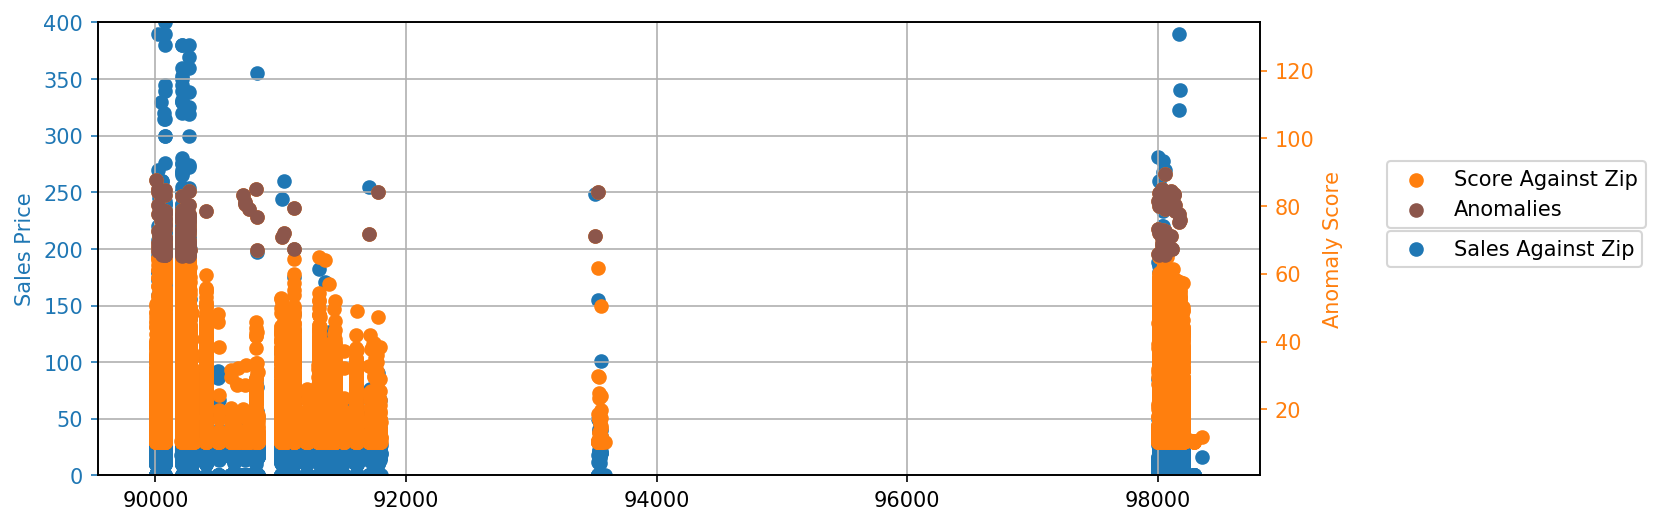

In [40]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax3 = ax1.twinx()

ax1.scatter(df_subset['PropertyZip'],df_subset['SalesPriceAmount'], color='C0',label='Sales Against Zip')
ax2.scatter(df_subset['PropertyZip'],df_subset['score'], color='C1', label = 'Score Against Zip')
ax2.scatter(anomalies['PropertyZip'],anomalies['score'], color='C5', label = 'Anomalies')

ax1.grid(which='major', axis='both')

ax1.set_ylabel('Sales Price', color='C0')
ax2.set_ylabel('Anomaly Score', color='C1')

ax1.tick_params('y', colors='C0')
ax2.tick_params('y', colors='C1')

ax1.set_ylim(0, 400)
ax2.set_ylim(min(scores), 1.5*max(anomalies['score']))
#ax3.set_ylim(min(scores), 1.5*max(anomalies['score']))
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.62))
#ax3.legend()
fig.set_figwidth(10)

In [43]:
for index,row in anomalies.iterrows():
    print("SalesPrice......:{}    PropertyAddress..:{} {} ".format(row['SalesPriceAmount']*100000,row['PropertyFullStreetAddress'], row['PropertyZip']))

SalesPrice......:18400000.0    PropertyAddress..:104 THE STRAND 90266.0 
SalesPrice......:18250000.0    PropertyAddress..:908 HARTFORD WAY 90210.0 
SalesPrice......:18500000.0    PropertyAddress..:755 STRADELLA RD 90077.0 
SalesPrice......:18500000.0    PropertyAddress..:100 N CAROLWOOD DR 90077.0 
SalesPrice......:18500000.0    PropertyAddress..:11459 BELLAGIO RD 90049.0 
SalesPrice......:18500000.0    PropertyAddress..:225 FACTORY AVE N 98057.0 
SalesPrice......:18500000.0    PropertyAddress..:320 N CAROLWOOD DR 90077.0 
SalesPrice......:18500000.0    PropertyAddress..:19116 BEARDSLEE BLVD 98011.0 
SalesPrice......:18600000.0    PropertyAddress..:2553 SUMMITRIDGE DR 90210.0 
SalesPrice......:18700000.0    PropertyAddress..:22160 PACIFIC COAST HWY 90265.0 
SalesPrice......:18720000.0    PropertyAddress..:12217 NE 165TH PL 98011.0 
SalesPrice......:18850000.0    PropertyAddress..:921 17TH ST NE 98002.0 
SalesPrice......:19000000.0    PropertyAddress..:1014 N ROXBURY DR 90210.0 
SalesPr

In [93]:
sagemaker.Session().delete_endpoint(rcf_inference.endpoint)

INFO:sagemaker:Deleting endpoint with name: randomcutforest-2019-02-01-08-16-07-171
